In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt

In [55]:
train_data=pd.read_csv('/content/drive/MyDrive/Dataset/titanic.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


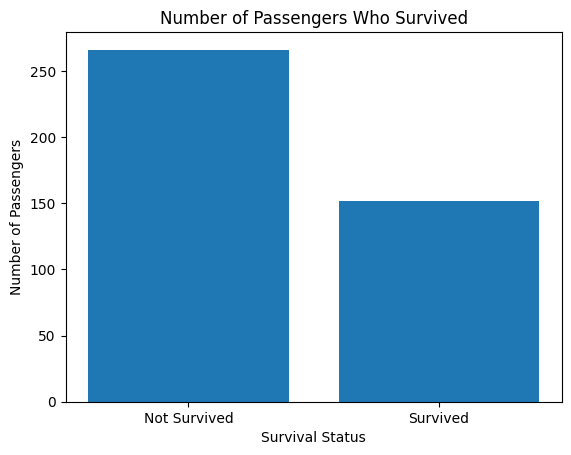

In [56]:
train_data = train_data.drop(columns=["PassengerId","Name","Embarked","Cabin","Ticket"])

# Plot the number of passengers who survived
survived_counts = train_data['Survived'].value_counts()

# Plotting
plt.bar(survived_counts.index, survived_counts.values, tick_label=['Not Survived', 'Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived')
plt.show()

In [57]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

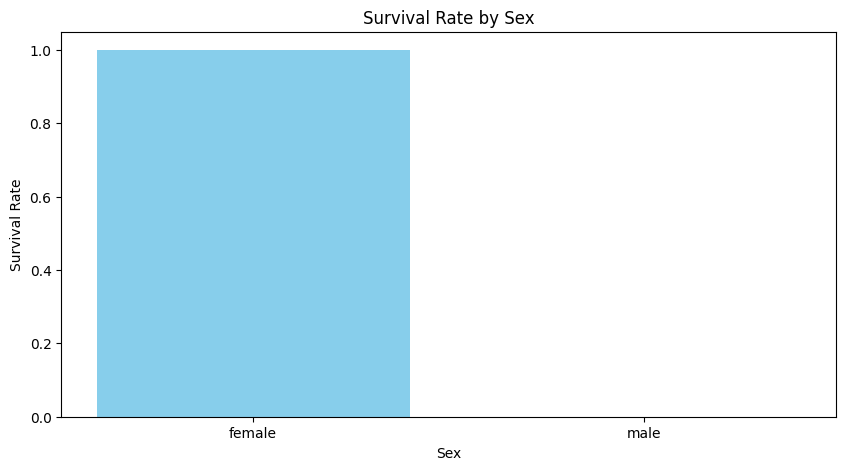

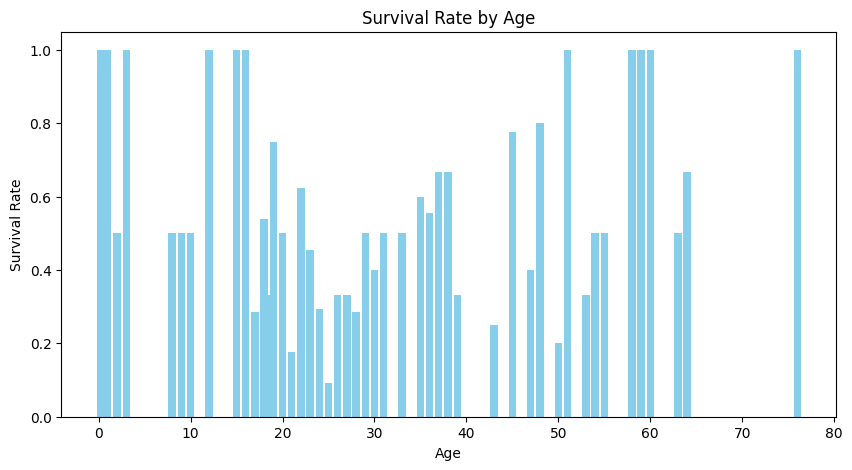

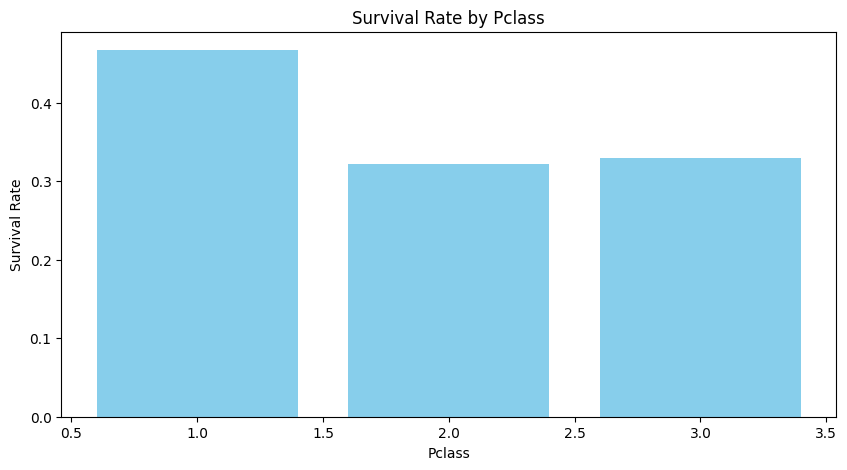

In [58]:
def create_bar_plot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 5))
    plt.bar(x, y, color='skyblue')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Grouping by Sex and Survived
sex_survived = train_data.groupby('Sex')['Survived'].mean()
create_bar_plot(sex_survived.index, sex_survived.values, 'Sex', 'Survival Rate', 'Survival Rate by Sex')

# Grouping by Sex and Survived
sex_survived = train_data.groupby('Age')['Survived'].mean()
create_bar_plot(sex_survived.index, sex_survived.values, 'Age', 'Survival Rate', 'Survival Rate by Age')

# Grouping by Pclass and Survived
pclass_survived = train_data.groupby('Pclass')['Survived'].mean()
create_bar_plot(pclass_survived.index, pclass_survived.values, 'Pclass', 'Survival Rate', 'Survival Rate by Pclass')

In [59]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].mean())

In [60]:
train_data['Sex'] = train_data['Sex'].map( {'female': 1,'male':0}).astype(int)
train_data['Fare'] = train_data['Fare'].astype(int)
train_data['Age'] = train_data['Age'].astype(int)

In [61]:
train_data.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
dtype: object

In [62]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,34,0,0,7
1,1,3,1,47,1,0,7
2,0,2,0,62,0,0,9
3,0,3,0,27,0,0,8
4,1,3,1,22,1,1,12
5,0,3,0,14,0,0,9
6,1,3,1,30,0,0,7
7,0,2,0,26,1,1,29
8,1,3,1,18,0,0,7
9,0,3,0,21,2,0,24


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

Train = train_data.drop(['Survived'], axis=1)
Test = train_data.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 42)

Logistic regression accuracy: 92.86%


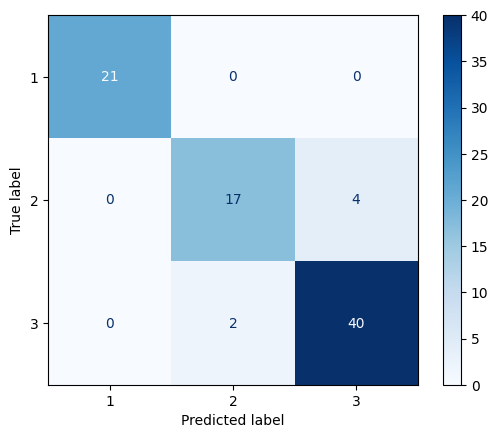

In [64]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)

joblib.dump(LR, 'logistic_regression_model.pkl')

y_pred = LR.predict(x_test)
LogRegAcc = accuracy_score(y_pred, y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LogRegAcc * 100))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Machine accuracy: 91.67%


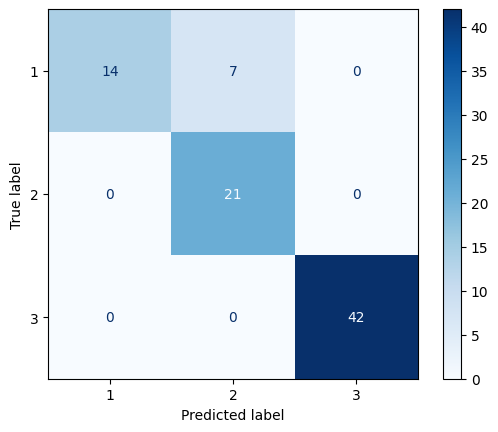

In [65]:
SVM = SVC(kernel='linear', max_iter=200)
SVM.fit(x_train, y_train)

joblib.dump(SVM, 'svm_model.pkl')

y_pred_svm = SVM.predict(x_test)
SVMAcc = accuracy_score(y_test, y_pred_svm)
print('Support Vector Machine accuracy: {:.2f}%'.format(SVMAcc * 100))

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=SVM.classes_)
disp_svm.plot(cmap=plt.cm.Blues)
plt.show()

In [66]:
from tabulate import tabulate

table = [
    ['Logistic Regression', '{:.2f}%'.format(LogRegAcc * 100)],
    ['SVM', '{:.2f}%'.format(SVMAcc * 100)]
]

headers = ['Model', 'Accuracy']
print(tabulate(table, headers=headers, tablefmt='grid'))

+---------------------+------------+
| Model               | Accuracy   |
+=====================+============+
| Logistic Regression | 92.86%     |
+---------------------+------------+
| SVM                 | 91.67%     |
+---------------------+------------+
